In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt

In [184]:
cmc_common_list = [['snow-covered plains', 'island', 'snow-covered forest', 'snow-covered swamp', 'sulfurous mire', 'volatile fjord', 'ice tunnel', 'snow-covered island', 'alpine meadow', 'shimmerdrift vale', 'glacial floodplain', 'rimewood falls', 'snowfield sinkhole', 'snow-covered mountain', 'highland forest', 'mountain', 'arctic treeline', 'swamp', 'plains', 'forest', 'woodland chasm'], ['jaspera sentinel', 'wings of the cosmos', 'brinebarrow intruder', 'weigh down', 'duskwielder', 'codespell cleric', 'snakeskin veil', 'bind the monster', 'valor of the worthy', 'village rites', "tormentor's helm", 'annul', 'battlefield raptor', 'fearless pup', 'frost bite'], ['roots of wisdom', 'arachnoform', 'deathknell berserker', 'guardian gladewalker', 'beskir shieldmate', 'strategic planning', 'demonic gifts', 'withercrown', 'elderfang disciple', 'vault robber', 'run amok', 'mists of littjara', 'story seeker', 'axgard cavalry', 'pilfering hawk', 'depart the realm', 'raise the draugr', 'sculptor of winter', 'immersturm raider', 'raven wings', 'funeral longboat', 'revitalize', 'goldvein pick', 'priest of the haunted edge', 'masked vandal', 'giant ox', 'karfell harbinger', 'disdainful stroke'], ['infernal pet', 'invoke the divine', 'ravenform', 'tuskeri firewalker', 'glittering frost', 'open the omenpaths', 'seize the spoils', 'goldmaw champion', "raiders' karve", 'broken wings', 'horizon seeker', 'bound in gold', "koma's faithful", 'doomskar oracle', 'gnottvold recluse', 'shackles of treachery', "king harald's revenge", 'starnheim courser', 'scorn effigy', 'draugr thought-thief', 'mammoth growth', 'mistwalker', 'iron verdict', 'demon bolt', 'grim draugr', 'breakneck berserker', 'icehide troll'], ['axgard braggart', 'craven hulk', 'stalwart valkyrie', 'behold the multiverse', 'jarl of the forsaken', 'struggle for skemfar', 'littjara kinseekers', 'smashing success', 'frostpeak yeti', 'feed the serpent', 'dogged pursuit', 'skull raid', 'elderleaf mentor', 'dwarven reinforcements', 'draugr recruiter', "sarulf's packmate", 'augury raven'], ['karfell kennel-master', 'master skald', 'warhorn blast', 'squash', 'berg strider', 'hagi mob', 'grizzled outrider'], ['undersea invader', 'dread rider', 'run ashore', "gods' hall guardian", 'ravenous lindwurm'], ['cinderheart giant']]
khm_ug = pd.read_csv("khm_ug.csv")
khm_rw = pd.read_csv("khm_rw.csv")

,Unnamed: 0,name
0,0,"reidane, god of the worthy // valkmira, protec..."
1,1,frenzied raider
2,2,frost bite
3,3,the bloodsky massacre
4,4,fearless pup
...,...,...
99,99,basalt ravager
100,100,demon bolt
101,101,reckless crew
102,102,battlefield raptor


In [3]:
BATCH_SIZE = 2000
CHUNKSIZE = BATCH_SIZE
def getDataIter():
    dataiter = pd.read_csv('game_data_public.KHM.PremierDraft.csv',chunksize=CHUNKSIZE)
    return dataiter

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 

<AxesSubplot:xlabel='num_turns'>

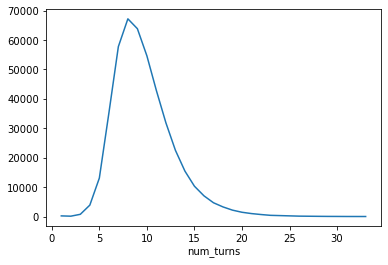

In [4]:
def group_num_turns(df):
    df["num_games"] = 1
    df = df.groupby(by="num_turns").sum()
    df = df["num_games"]
    return df

turn_count_iter = getDataIter()
turn_count = next(turn_count_iter)
turn_count = group_num_turns(turn_count)
counter = 0
for batch in turn_count_iter:
    print(counter,end=" ")
    batch = group_num_turns(batch)
    turn_count = turn_count.add(batch,fill_value=0)
    counter += 1
turn_count.plot()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 

<AxesSubplot:xlabel='drawn'>

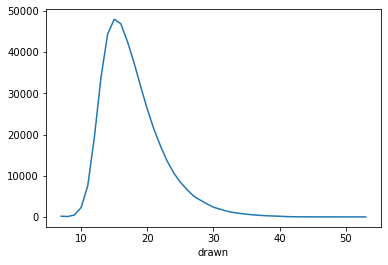

In [5]:
def group_card_count(df):
    df["drawn"] = df.loc[:,df.columns.str.contains("drawn")].sum(axis=1)
    df["drawn"] += df.loc[:,df.columns.str.contains("opening")].sum(axis=1)
    df["num_games"] = 1
    df = df.groupby(by="drawn").sum()
    df = df["num_games"]
    return df

card_count_iter = getDataIter()
card_count = next(card_count_iter)
card_count = group_card_count(card_count)
counter = 0
for batch in card_count_iter:
    print(counter, end=" ")
    batch = group_card_count(batch)
    card_count = card_count.add(batch,fill_value=0)
    counter += 1
card_count.plot()

In [6]:
data = next(getDataIter())
#data.columns = [column.lower() for column in data.columns]
for column in data.columns:
    print(column)
cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
drawn = data[map(lambda x : "drawn_"+x,cards)]
open = data[map(lambda x : "opening_hand_"+x,cards)]
print(drawn.shape, open.shape, (drawn+open).shape)

user_win_rate_bucket
user_n_games_bucket
draft_id
build_index
draft_time
expansion
event_type
game_number
rank
on_play
num_mulligans
opp_num_mulligans
opp_colors
num_turns
won
opening_hand_Absorb Identity
opening_hand_Aegar, the Freezing Flame
opening_hand_Alpine Meadow
opening_hand_Alrund's Epiphany
opening_hand_Alrund, God of the Cosmos
opening_hand_Annul
opening_hand_Arachnoform
opening_hand_Arctic Treeline
opening_hand_Armed and Armored
opening_hand_Arni Brokenbrow
opening_hand_Arni Slays the Troll
opening_hand_Ascendant Spirit
opening_hand_Ascent of the Worthy
opening_hand_Augury Raven
opening_hand_Avalanche Caller
opening_hand_Axgard Armory
opening_hand_Axgard Braggart
opening_hand_Axgard Cavalry
opening_hand_Barkchannel Pathway
opening_hand_Basalt Ravager
opening_hand_Battershield Warrior
opening_hand_Battle Mammoth
opening_hand_Battle for Bretagard
opening_hand_Battle of Frost and Fire
opening_hand_Battlefield Raptor
opening_hand_Bearded Axe
opening_hand_Behold the Multiverse
o

(2000, 321) (2000, 321) (2000, 642)


In [17]:
def add_turn_weight_cols(data):
    data["turn_weight"] = data["num_turns"].apply(lambda x : turn_count_prob[x])
    cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
    turn_col = ["turn_weight_" + col for col in cards]
    data[turn_col] = \
        data[map(lambda x : "drawn_"+x,cards)].to_numpy() \
        + data[map(lambda x : "opening_hand_"+x,cards)].to_numpy()
    data[turn_col] = data[turn_col] > 0
    data[turn_col] = data[turn_col].mul(data["turn_weight"], axis=0)
    turn_won_col = ["turn_weight_won_" + col for col in  cards]
    data[turn_won_col] = data[turn_col].mul(data["won"],axis=0)
    return data
    
def add_cards_drawn_weight_cols(data):
    data["drawn_weight"] = data.loc[:,data.columns.str.contains("drawn")].sum(axis=1)
    data["drawn_weight"] += data.loc[:,data.columns.str.contains("opening")].sum(axis=1)
    data["drawn_weight"] = data["drawn_weight"].apply(lambda x : card_count_prob[x])
    cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
    in_hand_col = ["in_hand_weight_" + col for col in cards]
    data[in_hand_col] = \
        data[map(lambda x : "drawn_"+x,cards)].to_numpy() \
        + data[map(lambda x : "opening_hand_"+x,cards)].to_numpy()
    data[in_hand_col] = data[in_hand_col] > 0
    data[in_hand_col] = data[in_hand_col].mul(data["drawn_weight"], axis=0)
    in_hand_won_col = ["in_hand_weight_won_" + col for col in  cards]
    data[in_hand_won_col] = data[in_hand_col].mul(data["won"],axis=0)
    return data

def add_idw(data):
    cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
    idw_col = ["idw_won_" + col for col in cards]
    data[idw_col] = data.loc[:,data.columns.str.contains("deck")].mul(data["won"],axis=0)
    return data

def add_other_metrics(data):
    cards = [col.replace("deck_","") for col in data.columns if 'deck' in col]
    opening = ["ohw_" + col for col in cards]
    data[opening] = data.loc[:,data.columns.str.contains("opening_hand")].mul(data["won"],axis=0)
    drawn = ["dw_" + col for col in cards]
    data[drawn] = data.loc[:,data.columns.str.contains("drawn")].mul(data["won"],axis=0)
    return data


def add_cols(data):
    data = add_other_metrics(data)
    data = add_idw(data)
    data = add_turn_weight_cols(data)
    data = add_cards_drawn_weight_cols(data)
    return data
    
card_count_prob = card_count/sum(card_count)
turn_count_prob = turn_count/sum(turn_count)
data_iter = getDataIter()
data = next(data_iter)
data = add_cols(data)
data = data.sum()
counter = 0
for chunk in data_iter:
    print(counter,end=" ")
    chunk = add_cols(chunk)
    data += chunk.sum()
    counter += 1
data

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 

user_win_rate_bucket                                                                 236141
user_n_games_bucket                                                                54525809
draft_id                                  2e0eef1fee1e4fb88d76e6a2fcd0a87e2e0eef1fee1e4f...
build_index                                                                          146427
draft_time                                2021-03-10 03:54:002021-03-10 03:54:002021-03-...
                                                                ...                        
in_hand_weight_won_Weigh Down                                                        817.23
in_hand_weight_won_Wings of the Cosmos                                              309.254
in_hand_weight_won_Withercrown                                                      336.067
in_hand_weight_won_Woodland Chasm                                                   902.425
in_hand_weight_won_Youthful Valkyrie                                            

In [18]:
data.to_csv("KHM_compare_winrates")

In [21]:
for index in data.index:
    print(index)

user_win_rate_bucket
user_n_games_bucket
draft_id
build_index
draft_time
expansion
event_type
game_number
rank
on_play
num_mulligans
opp_num_mulligans
num_turns
won
opening_hand_Absorb Identity
opening_hand_Aegar, the Freezing Flame
opening_hand_Alpine Meadow
opening_hand_Alrund's Epiphany
opening_hand_Alrund, God of the Cosmos
opening_hand_Annul
opening_hand_Arachnoform
opening_hand_Arctic Treeline
opening_hand_Armed and Armored
opening_hand_Arni Brokenbrow
opening_hand_Arni Slays the Troll
opening_hand_Ascendant Spirit
opening_hand_Ascent of the Worthy
opening_hand_Augury Raven
opening_hand_Avalanche Caller
opening_hand_Axgard Armory
opening_hand_Axgard Braggart
opening_hand_Axgard Cavalry
opening_hand_Barkchannel Pathway
opening_hand_Basalt Ravager
opening_hand_Battershield Warrior
opening_hand_Battle Mammoth
opening_hand_Battle for Bretagard
opening_hand_Battle of Frost and Fire
opening_hand_Battlefield Raptor
opening_hand_Bearded Axe
opening_hand_Behold the Multiverse
opening_hand

sideboard_Haunting Voyage
sideboard_Hengegate Pathway
sideboard_Highland Forest
sideboard_Horizon Seeker
sideboard_Ice Tunnel
sideboard_Icebind Pillar
sideboard_Icebreaker Kraken
sideboard_Icehide Troll
sideboard_Immersturm Predator
sideboard_Immersturm Raider
sideboard_Immersturm Skullcairn
sideboard_In Search of Greatness
sideboard_Infernal Pet
sideboard_Inga Rune-Eyes
sideboard_Invasion of the Giants
sideboard_Invoke the Divine
sideboard_Iron Verdict
sideboard_Island
sideboard_Jarl of the Forsaken
sideboard_Jaspera Sentinel
sideboard_Jorn, God of Winter
sideboard_Kaldring, the Rimestaff
sideboard_Kardur's Vicious Return
sideboard_Kardur, Doomscourge
sideboard_Karfell Harbinger
sideboard_Karfell Kennel-Master
sideboard_Kaya the Inexorable
sideboard_Kaya's Onslaught
sideboard_King Harald's Revenge
sideboard_King Narfi's Betrayal
sideboard_Koll, the Forgemaster
sideboard_Kolvori, God of Kinship
sideboard_Koma's Faithful
sideboard_Koma, Cosmos Serpent
sideboard_Littjara Glade-Warden
sid

idw_won_Varragoth, Bloodsky Sire
idw_won_Vault Robber
idw_won_Vega, the Watcher
idw_won_Vengeful Reaper
idw_won_Village Rites
idw_won_Volatile Fjord
idw_won_Vorinclex, Monstrous Raider
idw_won_Waking the Trolls
idw_won_Warchanter Skald
idw_won_Warhorn Blast
idw_won_Weathered Runestone
idw_won_Weigh Down
idw_won_Wings of the Cosmos
idw_won_Withercrown
idw_won_Woodland Chasm
idw_won_Youthful Valkyrie
turn_weight
turn_weight_Absorb Identity
turn_weight_Aegar, the Freezing Flame
turn_weight_Alpine Meadow
turn_weight_Alrund's Epiphany
turn_weight_Alrund, God of the Cosmos
turn_weight_Annul
turn_weight_Arachnoform
turn_weight_Arctic Treeline
turn_weight_Armed and Armored
turn_weight_Arni Brokenbrow
turn_weight_Arni Slays the Troll
turn_weight_Ascendant Spirit
turn_weight_Ascent of the Worthy
turn_weight_Augury Raven
turn_weight_Avalanche Caller
turn_weight_Axgard Armory
turn_weight_Axgard Braggart
turn_weight_Axgard Cavalry
turn_weight_Barkchannel Pathway
turn_weight_Basalt Ravager
turn_weig

in_hand_weight_won_Glorious Protector
in_hand_weight_won_Gnottvold Recluse
in_hand_weight_won_Gnottvold Slumbermound
in_hand_weight_won_Gods' Hall Guardian
in_hand_weight_won_Goldmaw Champion
in_hand_weight_won_Goldspan Dragon
in_hand_weight_won_Goldvein Pick
in_hand_weight_won_Graven Lore
in_hand_weight_won_Great Hall of Starnheim
in_hand_weight_won_Grim Draugr
in_hand_weight_won_Grizzled Outrider
in_hand_weight_won_Guardian Gladewalker
in_hand_weight_won_Hagi Mob
in_hand_weight_won_Hailstorm Valkyrie
in_hand_weight_won_Hakka, Whispering Raven
in_hand_weight_won_Halvar, God of Battle
in_hand_weight_won_Harald Unites the Elves
in_hand_weight_won_Harald, King of Skemfar
in_hand_weight_won_Harnfel, Horn of Bounty
in_hand_weight_won_Haunting Voyage
in_hand_weight_won_Hengegate Pathway
in_hand_weight_won_Highland Forest
in_hand_weight_won_Horizon Seeker
in_hand_weight_won_Ice Tunnel
in_hand_weight_won_Icebind Pillar
in_hand_weight_won_Icebreaker Kraken
in_hand_weight_won_Icehide Troll
in_h

In [85]:
def getCols(N,win,name, data):
    cards = [col.replace("deck_","") for col in data.index if 'deck' in col]
    col1 = data.loc[N+ "Absorb Identity":N+"Youthful Valkyrie"].to_numpy()
    col2 = data.loc[win+"Absorb Identity":win+"Youthful Valkyrie"].to_numpy()
    col2 = col2/(col1 + 0.0000000000001)
    a = np.array([col1,col2]).T
    df = pd.DataFrame(data=a, index=cards, columns=[name+"_N",name+"_winrate"])
    return df

summary = getCols("opening_hand_","ohw_","opening_hand", data)
summary[["drawn_N","drawn_winrate"]] = getCols("drawn_","dw_","drawn",data)
summary[["deck_N","deck_winrate"]] = getCols("deck_","idw_won_","deck",data)
summary[["weighted_ever_in_hand_N","weighted_ever_in_hand_winrate"]] = getCols("in_hand_weight_","in_hand_weight_won_","weighted_ever_in_hand",data)
summary[["weighted_turn_won_N","weighted_turn_won_winrate"]] = getCols("turn_weight_","turn_weight_won_","weighted_turn",data)
summary

,opening_hand_N,opening_hand_winrate,drawn_N,drawn_winrate,deck_N,deck_winrate,weighted_ever_in_hand_N,weighted_ever_in_hand_winrate,weighted_turn_won_N,weighted_turn_won_winrate
Absorb Identity,0,0,0,0,0,0,0,0,0,0
"Aegar, the Freezing Flame",9260,0.589957,16757,0.586919,53462,0.560323,1377.9,0.56134,2248.32,0.590788
Alpine Meadow,9442,0.554332,14004,0.547486,52654,0.547708,1561.4,0.526354,2285.01,0.548809
Alrund's Epiphany,1130,0.552212,2100,0.619048,6829,0.5503,192.282,0.560454,308.011,0.59455
"Alrund, God of the Cosmos",1301,0.59339,4029,0.592455,7271,0.543804,191.712,0.539671,331.18,0.576545
...,...,...,...,...,...,...,...,...,...,...
Weigh Down,9339,0.48699,15525,0.535266,58092,0.519676,1619.1,0.504744,2238.25,0.521045
Wings of the Cosmos,2925,0.564444,4669,0.571857,18901,0.564573,542.699,0.569843,728.498,0.585925
Withercrown,4330,0.494688,7273,0.519593,25884,0.50282,694.191,0.484113,949.235,0.500869
Woodland Chasm,10641,0.563763,16278,0.550006,58132,0.539255,1713.19,0.526751,2533.49,0.54946


In [182]:
summary.to_csv("KHM_weighted_compare.csv")
summary.index = [index.lower() for index in summary.index]
khm_rw["name"].values

array(['pilfering hawk', 'battle mammoth',
       'jorn, god of winter // kaldring, the rimestaff', 'rune of might',
       'reflections of littjara', "esika's chariot",
       'binding the old gods', 'fynn, the fangbearer',
       'alrund, god of the cosmos // hakka, whispering raven',
       'icebreaker kraken', 'old-growth troll', "alrund's epiphany",
       'maja, bretagard protector', 'snakeskin veil', "sarulf's packmate",
       'grizzled outrider', 'berg strider', 'roots of wisdom',
       'blessing of frost', 'mistwalker', "giant's amulet",
       'karfell harbinger', 'graven lore', 'inga rune-eyes',
       'draugr thought-thief', 'horizon seeker', 'path to the world tree',
       'invasion of the giants', 'elvish warmaster',
       'behold the multiverse', 'struggle for skemfar', 'frostpeak yeti',
       'cyclone summoner', 'icehide troll', 'harald, king of skemfar',
       'battle for bretagard', 'harald unites the elves', 'run ashore',
       'boreal outrider', 'svella, ice 

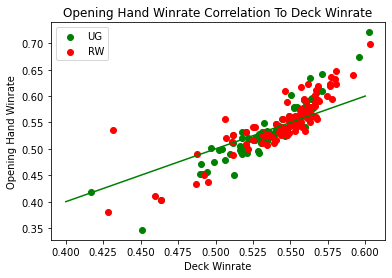

In [205]:
sel = [card for card in khm_ug["name"].values if '//' not in card]
ug = plt.scatter(summary.loc[sel, "deck_winrate"], summary.loc[sel, "opening_hand_winrate"], color='green', label="UG")
sel = [card for card in khm_rw["name"].values if '//' not in card]
rw = plt.scatter(summary.loc[sel, "deck_winrate"], summary.loc[sel, "opening_hand_winrate"], color='red', label="RW")
plt.plot(np.linspace(0.4,0.6,200),np.linspace(0.4,0.6,200), color='green' )
plt.xlabel('Deck Winrate')
plt.ylabel('Opening Hand Winrate')
plt.title("Opening Hand Winrate Correlation To Deck Winrate")
plt.legend(handles=[ug,rw])
plt.show()

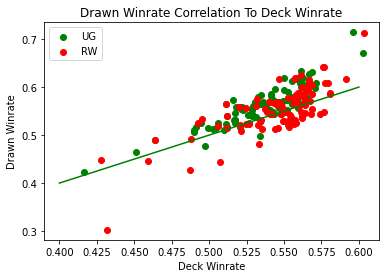

In [209]:
sel = [card for card in khm_ug["name"].values if '//' not in card]
ug = plt.scatter(summary.loc[sel, "deck_winrate"], summary.loc[sel, "drawn_winrate"], color='green', label="UG")
sel = [card for card in khm_rw["name"].values if '//' not in card]
rw = plt.scatter(summary.loc[sel, "deck_winrate"], summary.loc[sel, "drawn_winrate"], color='red', label="RW")
plt.plot(np.linspace(0.4,0.6,200),np.linspace(0.4,0.6,200), color='green' )
plt.xlabel('Deck Winrate')
plt.ylabel('Drawn Winrate')
plt.title("Drawn Winrate Correlation To Deck Winrate")
plt.legend(handles=[ug,rw])
plt.show()

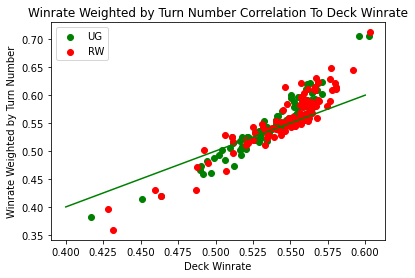

In [211]:
sel = [card for card in khm_ug["name"].values if '//' not in card]
ug = plt.scatter(summary.loc[sel, "deck_winrate"], summary.loc[sel, "weighted_turn_won_winrate"],color='green', label="UG")
sel = [card for card in khm_rw["name"].values if '//' not in card]
rw = plt.scatter(summary.loc[sel, "deck_winrate"], summary.loc[sel, "weighted_turn_won_winrate"], color='red', label="RW")
plt.plot(np.linspace(0.4,0.6,200),np.linspace(0.4,0.6,200), color='green' )
plt.xlabel('Deck Winrate')
plt.ylabel('Winrate Weighted by Turn Number')
plt.title("Winrate Weighted by Turn Number Correlation To Deck Winrate")
plt.legend(handles=[ug,rw])
plt.show()

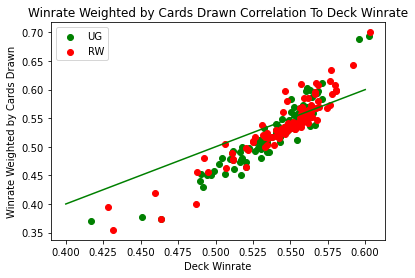

In [207]:
sel = [card for card in khm_ug["name"].values if '//' not in card]
ug = plt.scatter(summary.loc[sel, "deck_winrate"], summary.loc[sel, "weighted_ever_in_hand_winrate"], color='green', label="UG")
sel = [card for card in khm_rw["name"].values if '//' not in card]
rw = plt.scatter( summary.loc[sel, "deck_winrate"], summary.loc[sel, "weighted_ever_in_hand_winrate"], color='red', label="RW")
plt.plot(np.linspace(0.4,0.6,200),np.linspace(0.4,0.6,200), color='green' )
plt.xlabel('Deck Winrate')
plt.ylabel('Winrate Weighted by Cards Drawn')
plt.title("Winrate Weighted by Cards Drawn Correlation To Deck Winrate")
plt.legend(handles=[ug,rw])
plt.show()